In [2]:
%matplotlib inline

In [19]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from ipywidgets import interact


import patchworklib as pw 
pw.overwrite_axisgrid()

<Figure size 72x72 with 0 Axes>

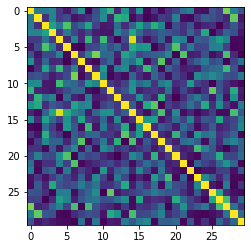

In [4]:
N = 30
v = np.random.normal(size=(N, N))
v = v + v.T #- np.diag(v.diagonal())
v = (np.abs(v)/v.max()) * 0.8
np.fill_diagonal(v, 1)
plt.imshow(v)

In [5]:
import pycircos
import matplotlib.pyplot as plt
Garc = pycircos.Garc
Gcircle = pycircos.Gcircle

In [6]:
def level(level, width=50, text=60, separation=40):
    p = 1000 - ((width + text + separation) * level) 
    return [p-width, p]

In [7]:
level(0), level(0, width=70)

([950, 1000], [930, 1000])

In [69]:
# @interact(sep44=(0, 1000, 1))
# def ss(sep44=145):


# circle = Gcircle(figsize=(8, 8))
circle = Gcircle(fig=pw.Brick._figure, figsize=(8, 8))


areas = {
    'R-Frontal':   [f'R-F{i}' for i in range(2)],
    'R-Parietal':  [f'R-P{i}' for i in range(3)],
    'R-Central':   [f'R-C{i}' for i in range(5)],
    'R-Occipital': [f'R-O{i}' for i in range(2)],
    'R-Temporal':  [f'R-T{i}' for i in range(3)],
    
    
    'L-Temporal':  [f'L-T{i}' for i in range(3)],
    'L-Occipital': [f'L-O{i}' for i in range(2)],
    'L-Central':   [f'L-C{i}' for i in range(5)],
    'L-Parietal':  [f'L-P{i}' for i in range(3)],
    'L-Frontal':   [f'L-F{i}' for i in range(2)],
}


electrodes = sum([len(areas[k]) for k in areas])


SMALL_SEPARATION = 5
BIG_SEPARATION = 20
SMIN = (360 - ((len(areas)-2)*SMALL_SEPARATION + (2*BIG_SEPARATION)))/electrodes


s1 = 0
i = 0
for area in areas:
    i += 1

    if i%(len(areas)/2):
        sep = SMALL_SEPARATION
    else:
        sep = BIG_SEPARATION

    s = SMIN * len(areas[area])

    arc = Garc(arc_id=f'{area}', facecolor=f'C{i}', edgecolor=f'C{i}', size=s, interspace=sep, raxis_range=level(1), labelposition=60, label_visible=True, labelsize=15)
    circle.add_garc(arc)
    s1 += (s + sep)


        
        
s2 = 0
i = 0
chs = []

for area in areas:
    i += 1

    if i%(len(areas)/2):
        sepe = 0
    else:
        sepe = BIG_SEPARATION

    for j, e in enumerate(areas[area], start=1):


        if j != len(areas[area]):
            sep = 0
        else:
            sep = SMALL_SEPARATION
            if sepe:
                sep = sepe

        arc = Garc(arc_id=f'{e}', facecolor='#c5c5c5', size=SMIN, interspace=sep, raxis_range=level(2), labelposition=60, label_visible=True, labelsize=15)
        circle.add_garc(arc)

        chs.append(f'{e}')
        s2 += (SMIN + sep)





arc = Garc(arc_id='Right hemisphere', facecolor='C6', edgecolor='C6', size=180-BIG_SEPARATION, interspace=BIG_SEPARATION, raxis_range=level(0, width=70), labelposition=60, label_visible=True, labelsize=15,
)
circle.add_garc(arc)
arc = Garc(arc_id='Left hemisphere', facecolor='C6', edgecolor='C6', size=180-BIG_SEPARATION, interspace=BIG_SEPARATION, raxis_range=level(0, width=70), labelposition=60, label_visible=True, labelsize=15,
)
circle.add_garc(arc)


circle.set_garcs(BIG_SEPARATION/2, (360*3)+BIG_SEPARATION/2)



threshold = 0.5

def map_(x, in_min, in_max, out_min, out_max):
    return (x - in_min) * (out_max - out_min) / (in_max - in_min) + out_min;


chords = []
for i, j in zip(*np.triu_indices(v.shape[0])):

    if v[i][j] < threshold:
        continue
    if i==j:
        continue
        
        
    kk = map_(v[i][j], threshold, v[v!=1].max(), 1, SMIN/2)
    
    w1 = (SMIN/2) - kk
    w2 = (SMIN/2) + kk
    
    x1, _ = level(2)
    source = (chs[i], w1*0.8, w2*0.8, x1-30)
    destination = (chs[j], w1*0.8, w2*0.8, x1-30)
    
    
    chords.append([v[i][j], source, destination])
    
    
norm = matplotlib.colors.Normalize(vmin=threshold, vmax=v[v!=1].max())




for v_, src, des in sorted(chords):
    circle.chord_plot(src, des, facecolor=plt.cm.get_cmap('viridis')(norm(v_), norm(v_)+0.2))
    

circle

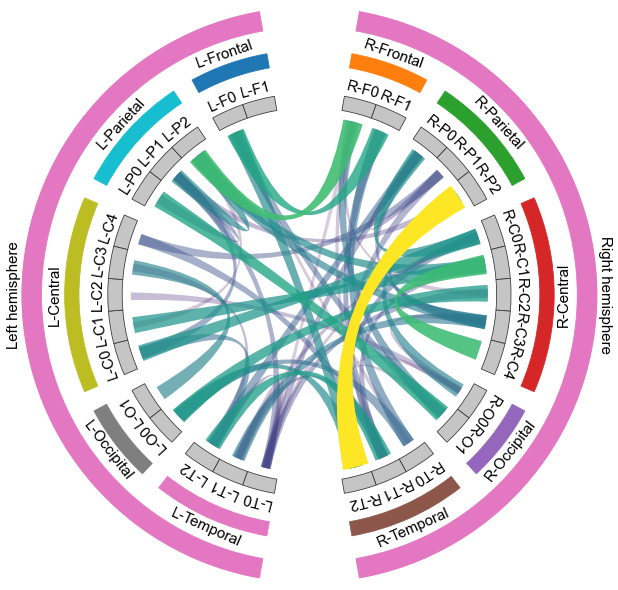

In [70]:
circos1 = pw.cBrick(ax=circle.ax)
circos1.savefig()

In [63]:
(circos1|ax2).

In [89]:
ax1 = pw.Brick(figsize=(1,1))
ax1.plot([1,2,3,4,5])

ax1.dist = 100

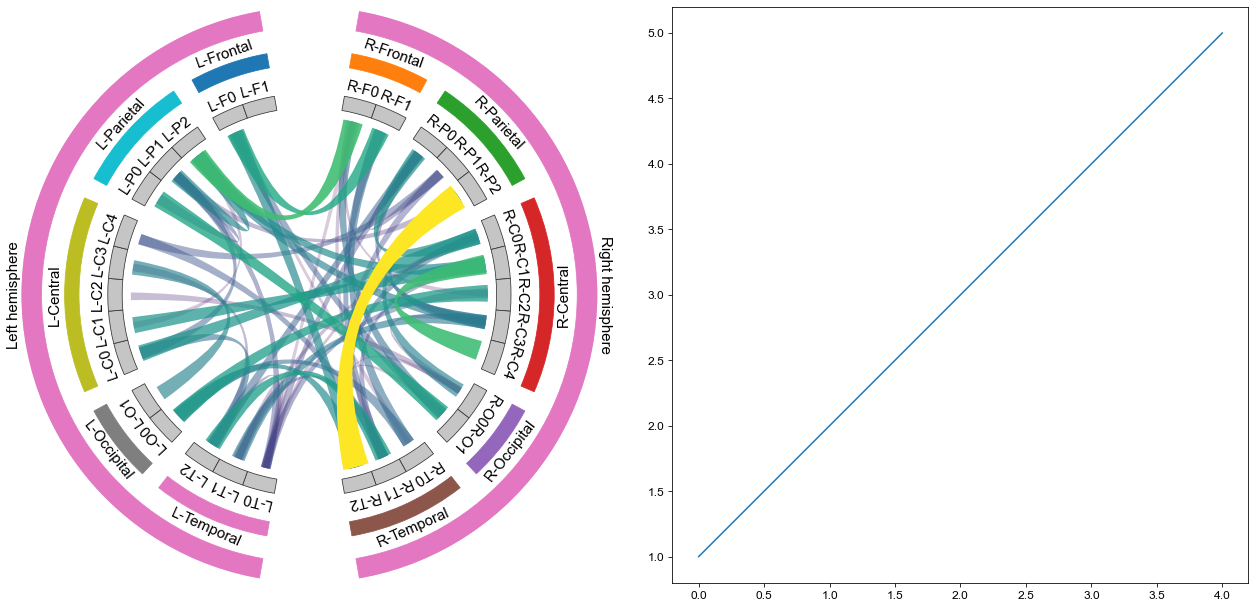

In [90]:
(circos1|ax1).savefig("nn.png")